# Bioinformatics Workshop 2021
### Cascabel_S5_practice
### Running Cascabel pipeline with VSearch (OTU)
### NIOZ102 16S BlackSea2013
#### Maartje Brouwer
#### 2021 Feb 17
###### This notebook is running Python 3.6.7

#### Cascabel practice

In [1]:
## 1. Navigate to the BlackSea13 project under your user workshop dedicated directory
%cd /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013

/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013


In [ ]:
## 2. Setup Cascabel 
#You can copy it from /export/data01/pipelines/CASCABEL
! cp -r /export/data01/pipelines/CASCABEL/ .
# cp -r copies an entire directory. the dot indicates copy in the current directory

## or clone it from GitHub
# git clone https://github/AlejandroAb/CASCABEL.git

In [2]:
# Go to CASCABEL directory
%cd CASCABEL

/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/CASCABEL


##### background info
We are going to work with a subset of 200,000 reads with amplicon data from the Black Sea cruise. There are two different datasets belonging to the same samples, but PCR amplified with different primers:  
* NIOZ101 -18S
* Paired end – 2 x 300 
* FW Primer: GCTTGTCTCAAAGATTAAGCC
* RV Primer: CCTGCTGCCTTCCTTRGA
* NIOZ102 -16S
* Paired end – 2x300
* FW Primer: GTGYCAGCMGCCGCGGTAA
* RV Primer: GGACTACNVGGGTWTCTAAT

Select one of these two datasets to continue working for downstream steps.
###### I chose 16S 

In [3]:
## 3. Activate Cascabel dependencies
# at ada
! source ~/.bashrc.conda3
! source activate qiime1
! export PATH=$PATH:/opt/biolinux/anaconda3/bin
! module load R/4.0.3
! unset LD_PRELOAD

# at YMGA
# ! source  ~/.zshrc.conda344

Anaconda is now active on server ada with base /opt/biolinux/anaconda3          python version : 3.6.7.final.0
Run "conda deactivate" command to deactivate and exit current python environment


##### Configuration files
As you can see, there are different configuration files on the CASCABEL directory. These configuration files, are already preconfigured for some specific workflows
* config.asv.double_bc.yaml  ASV workflow for paired end data
* config.asv.double_bc.unpaired.yaml ASV workflow for paired end data and “unpaired” reads.
* config.asv.single_bc.yaml ASV workflow for single end data
* config.otu.double_bc.yaml OTU workflow for paired end data
* config.otu.double_bc.unpaired.yaml OTU workflow for paired end data and “unpaired” reads.

First copy the config file and name it  
`! cp config.otu.double_bc.yaml config.otu_swarm.double_bc.NIOZ102.yaml`  
Then load the new file  
`%load config.otu_swarm.double_bc.NIOZ102.yaml`  
Then write `%%writefile config.otu_swarm.double_bc.NIOZ102.yaml` command on top  
edit file and run the `%%writefile` command

[databases can be found here] (http://redmine.nioz.nl/projects/pipeline-for-amplicon-analysis/wiki/Run#9-Database)

In [18]:
%%writefile config.otu.double_bc.N102.yaml

#%load config.otu.double_bc.N102.yaml
################################################################################
#                             CONFIGURATION FILE                               #
#------------------------------------------------------------------------------#
# Configuration file for the CASCABEL pipeline.                                #
# Set the parameters below, save the file and run Snakemake.                   #
# The file format is yaml (http://www.yaml.org/). In this file, you specify    #
# your input data, barcode mapping file and you can choose tools and parameters#
# according to your needs. Most rules and parameters have default settings.    #
# It is very important to keep the indentation of the file (don’t change the   #
# tabs and spaces), as well as the name of the parameters/variables. But you   #
# can of course change the values of the parameters to deviate from the default# 
# settings. Any text after a hashtag (#) is considered a comment and will be   #
# ignored by Snakemake.                                                        #
#                                                                              #
# @Author: Julia Engelmann and Alejandro Abdala                                #
# @Last update: 16/11/2020                                                     #
################################################################################

################################################################################
#                       GENERAL PARAMETERS SECTION                             # 
#------------------------------------------------------------------------------#
# The general parameters section defines parameters that are global or general #
# for the complete workflow.                                                   #
################################################################################

#------------------------------------------------------------------------------#
#                                Execution mode                                #
#------------------------------------------------------------------------------#
# This parameter allows the user to inspect intermediate files in order to     #
# finetune some downstream analyses, re-do previous steps or exit the workflow.#
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #	            
# -interactive   Set this flag to "T" (default) in order to interact at some   #
#                specific steps with the pipeline. "F" will try to run all the #
#                pipeline without communicating intermediate results until the #
#                report.                                                       # 
# For a list for all the interactive checkpoints take a look at the following  #
# link: https://github.com/AlejandroAb/CASCABEL/wiki#5-interactive-mode        #
#------------------------------------------------------------------------------#
interactive : "T"

#------------------------------------------------------------------------------#
#                             Project Name                                     #
#------------------------------------------------------------------------------#
# The name of the project for which the pipeline will be executed. This should #
# be the same name used as the first parameter with the init_sample.sh script  #
# (if used for multiple libraries).                                            #
#------------------------------------------------------------------------------#
PROJECT: "BlackSea2016"

#------------------------------------------------------------------------------#
#                            LIBRARIES/SAMPLES                                 #
#------------------------------------------------------------------------------#
# SAMPLES/LIBRARIES you want to include in the analysis.                       #
# Use the same library names as with the init_sample.sh script.                #
# Include each library name surrounded by quotes, and comma separated.         #
# i.e LIBRARY:  ["LIB_1","LIB_2",..."LIB_N"]                                   #
# LIBRARY_LAYOUT: Configuration of the library; all the libraries/samples      #
#                 must have the same configuration; use:                       #
#                 "PE" for paired-end reads [Default].                         #
#                 "SE" for single-end reads.                                   #
#------------------------------------------------------------------------------#
LIBRARY: ["NIOZ102"]
LIBRARY_LAYOUT: "PE"
#------------------------------------------------------------------------------#
#                               RUN                                            #
#------------------------------------------------------------------------------#
# Name of the RUN - Only use alphanumeric characters and don't use spaces.     #
# This parameter helps the user to execute different runs (pipeline executions)#
# with the same input data but with different parameters (ideally).            #
# The RUN parameter can be set here or remain empty, in the latter case, the   #
# user must assign this value via the command line.                            #
# i.e:  --config RUN=run_name                                                  #
#------------------------------------------------------------------------------#
RUN: "Workshop_test"

#------------------------------------------------------------------------------#
#                           Description                                        #
#------------------------------------------------------------------------------#
# Brief description of the run. Any description written here will be included  #
# in the final report. This field is not mandatory so it can remain empty.     #
#------------------------------------------------------------------------------#
description: ""

#------------------------------------------------------------------------------#
#                             INPUT TYPE                                       #
#------------------------------------------------------------------------------#
# Cascabel supports two types of input files, fastq and gzipped fastq files.   #     
# This parameter can take the values "T" if the input files are gzipped        #
# (only the reads!, the metadata file always needs to be uncompressed) or "F"  #
# if the input files are regular fastq files.                                  #
#------------------------------------------------------------------------------#
gzip_input: "F"

#------------------------------------------------------------------------------#
#                             INPUT FILES                                      #
#------------------------------------------------------------------------------#
# To run Cascabel for multiple libraries you can provide an input file, tab    #
# separated with the following columns:                                        #
# - Library: Name of the library (this have to match with the values entered   #
#            in the LIBRARY variable described above).                         #
# - Forward reads: Full path to the forward reads.                             #
# - Reverse reads: Full path to the reverse reads (only for paired-end).       #
# - metadata:      Full path to the file with the information for              #
#                  demultiplexing the samples (only if needed).                #
# The full path of this file should be supplied in the input_files variable,   #
# otherwise, you have to enter the FULL PATH for both: the raw reads and the   #
# metadata file (barcode mapping file). The metadata file is only needed if    #
# you want to perform demultiplexing.                                          #
# If you want to avoid the creation of this file a third solution is available #
# using the script init_sample.sh. More info at the project Wiki:              #
# https://github.com/AlejandroAb/CASCABEL/wiki#21-input-files                  #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - fw_reads:  Full path to the raw reads in forward direction (R1)            #
# - rw_reads:  Full path to the raw reads in reverse direction (R2)            #
# - metadata:  Full path to the metadata file with barcodes for each sample    #
#              to perform library demultiplexing                               #
# - input_files: Full path to a file with the information for the library(s)   #
#                                                                              #
# ** Please supply only one of the following:                                  #
#     - fw_reads, rv_reads and metadata                                        #
#     - input_files                                                            #
#     - or use init_sample.sh script directly                                  #
#------------------------------------------------------------------------------#
fw_reads: "/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ102_1.fastq"
rv_reads: "/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ102_2.fastq"
metadata: "/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/ProjectInfo/NIOZ102/NIOZ102_16S_blackSea.txt"
#OR
input_files: ""

################################################################################
#                          REPORT PARAMETER SECTION                            #
#------------------------------------------------------------------------------#
# This section defines parameters that will influence the type of report to be #
# generated at the end of the workflow.                                        #
################################################################################


#------------------------------------------------------------------------------#
#                           PDF Report                                         #
#------------------------------------------------------------------------------#
# By default, Cascabel creates the final report in HTML format. In order to    #
# create the report also as pdf file, set this flag to "T".                    #
# Important! in order to convert the file to pdf format, it is necessary to    #
# execute the pipeline within a Xserver session i.e MobaXterm or ssh -X.       #
# One way to validate if your active session is using an Xserver, execute      #
# 'echo $DISPLAY'  on a command line terminal. If this returns empty, you do   #
# not have an Xserver session.                                                 #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - pdfReport            "T" for generate pdf report or "F" to skip it.        #
# - wkhtmltopdf_command  name w/wo path to execute the html to pdf translation.#
#------------------------------------------------------------------------------#
pdfReport: "T"
wkhtmltopdf_command: "wkhtmltopdf -T 10mm -B 30mm "

#------------------------------------------------------------------------------#
#                           Portable Report                                    #
#------------------------------------------------------------------------------#
# Cascabel creates the final report in HTML format, containing references to   #
# other images or links. Therefore just copying the HTML files for sharing or  #
# inspecting the results will break these links.                               #
# By setting 'portableReport' to true "T", CASCABEL will generate a zip file   #
# with all the resources necessary to share and distribute CASCABEL's report.  #
#------------------------------------------------------------------------------#
portableReport: "T"

#------------------------------------------------------------------------------#
#                           Krona Report                                       #
#------------------------------------------------------------------------------#
# Krona allows hierarchical data to be explored with zooming, multi-layered pie#
# charts. The interactive charts are self-contained and can be viewed with any #
# modern web browser.                                                          #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - report        Indicate with "T"/"F" if CASCABEL should generate a Krona    #
#                 chart.                                                       #
# - ktImportText  Name of the command to invoke this krona utility.            #
# - samples       Indicate the samples to be included in the chart, use comma  #
#                 separated values of samples (same name as the ones supplied  #
#                 in the metadata barcode file). Or "all" to include all the   #
#                 samples.                                                     #
# - otu_table     Target OTU table for the report. Use "default" to use the    #
#                 filtered OTU table (exclude singletons). Or "singletons" to  #
#                 use the non filtered OTU table (include singletons)          #  
# - extra_params  Any other extra parameter from ktImportText tool. default    #
#                 "-n root_extra"                                              #
#------------------------------------------------------------------------------#
krona:
  report: "T"
  command: "ktImportText"
  samples: "all"
  otu_table: "default"
  extra_params: "-n root_extra"

################################################################################
#                        Specific Parameters Section                           #
#------------------------------------------------------------------------------#
# In this section of the configuration file, you can find all the parameters   #
# used to run the different rules during the execution of the pipeline.        #
# Some of the entries below contain a parameter called "extra_params".         #
# This parameter is designed to allow the user to pass any other extra         #
# parameter to the program invoked by the rule, as some rules do not list all  #
# the parameters of the underlying tool explicitly. In these cases, the user   #
# can specify any other parameter using "extra_params".                        #
# IMPORTANT NOTE:                                                              #
# After defining the type of analysis, in the header of the comments for each  #
# set of parameters, you will see a prefix indicating if the parameters/options# 
# apply for the OTU workflow, the ASV workflow or both. For more information in# 
# the type of analyses, please refer to the next section "ANALYSIS TYPE".      #
################################################################################

#------------------------------------------------------------------------------#
#                                 ANALYSIS TYPE                                #
# rules:                                                                       #
#------------------------------------------------------------------------------#
# Cascabel supports two main types of analysis:                                #
#  1) Analysis based on traditional OTUs (Operational Taxonomic Units) which   #
#     are mostly generated by clustering sequences based on a shared           #
#     similarity threshold.                                                    #
#  2) Analysis based on ASVs (Amplicon sequence variants). This kind of        #
#     analysis tries to distinguish errors in the sequence reads from true     #
#     sequence variants, down to the level of single-nucleotide differences.   #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              # 
# - ANALYSIS_TYPE    "OTU" or "ASV". Defines the type analysis                 #
#------------------------------------------------------------------------------#
ANALYSIS_TYPE: "OTU"


#------------------------------------------------------------------------------#
# BOTH_WF:                  UNPAIRED DATA WORK FLOW                             #
#------------------------------------------------------------------------------#
# A regular workflow for marker gene analysis using paired-end data,           #
# comprehends the merging of forward and reverse reads, prior to continuing    #
# with downstream analysis implemented within this pipeline.   	  	           #
# However, primers can intentially amplify fragments which are so large that   #
# forward and reverse reads do not overlap. A regular analysis would discard   #
# all those "unpaired" reads during the FW and RV read assembly. For this      #
# scenario, Cascabel implements an alternative flow, where instead of          #
# continuing with assembled reads, un-assembled reads are concatenated together# 
# with a degenerated base 'N' between the FW read and the reverse complemented #
# RV read (which does not significantly influence k-mer based classification   #
# methods such as RDP).                                                        #                                                                             #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
#                                                                              # 
# - UNPAIRED_DATA_PIPELINE    "T" or "F". True to work with the "un-assembled" #
#                             reads. If ANALYSIS_TYPE = "ASV" this option use  #
#                             the "justConcatenate" option from the            #
#                             mergePairs() function from the dada2 package.    #
# - CHAR_TO_PAIR              In-silico base used to pair both fragments.      #
#                             Valid values A|T|G|C|N. You can use more than one#
#                             base, e.g. "GGGGG" pair with 5 Gs.               #
#                             This parameter only applies for the OTU-WF. For  #
#                             the ASV-WF, dada2 merge both reads with 10 Ns.   # 
# - QUALITY_CHAR              The forward and reverse reads are paired         #
#                             in-silico in a fastq file, thus the quality for  #
#                             the pairing bases must be provided. If more than #
#                             one CHAR_TO_PAIR is used, you only need to       #
#                             specify one and only one QUALITY_CHAR.           #
#                             This parameter only applies for the OTU-WF. For  #
#                             the ASV-WF, dada2 merge both reads with 10 Ns.   #  
#------------------------------------------------------------------------------#
UNPAIRED_DATA_PIPELINE: "F"
CHAR_TO_PAIR: "T"
QUALITY_CHAR: "G"


#------------------------------------------------------------------------------#
# BOTH_WF:               Quality control with FastQC                           #
# rules: fast_qc, validateQC                                                   #
#------------------------------------------------------------------------------#
# FastQC evaluates 12 main concepts on the sequences: basic statistics, per    #
# base sequence quality, per tile sequence quality, per sequence quality       #
# scores, per base sequence content, per sequence GC content, per base N       #
# content, sequence length distribution, sequence duplication levels,          #
# overrepresented sequences, adapter content and Kmer content.                 #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - command       Command needed to invoke fastqc [default: "fastqc"].         #
# - extra_params  Extra parameters. See fastqc --help for more info.           #
# - qcLimit       Set the maximum number of FastQC FAILS (from the 12 tests    #
#                 evaluated) accepted before interrupting the workflow if the  #
#                 'interactive' mode is equal to "T".                          #
#------------------------------------------------------------------------------#
fastQC:
  command: "fastqc"
  extra_params: ""
  qcLimit : 3

#------------------------------------------------------------------------------#
# BOTH_WF:       Assemble fragments (merge forward with reverse reads)         #
# rule: pear                                                                   #
#------------------------------------------------------------------------------#
# This step is performed to merge paired reads.                                #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - t             Minimum length of reads after trimming low quality bases.    #
# - v             Minimum overlap size. The minimum overlap may be set to 1    #
#                 when the statistical test is used. (default in pear: 10)     #
# - j             Number of threads to use.                                    #
# - p             The p-value cutoff used in the statistical test. Valid       #
#                 options are: 0.0001, 0.001, 0.01, 0.05 and 1.0. Setting 1.0  #
#                 disables the test. (default: 0.01)                           #
# - extra_params  Extra parameters. See pear --help for more info.             #
# - prcpear       The minimum percentage of expected paired reads, if the      #
#                 actual percentage is lower and the 'interactive' parameter   #
#                 is set to "T"; a warning message will be shown.              #
#------------------------------------------------------------------------------#
pear:
  command: "pear"
  t: 100
  v: 10
  j: 6
  p: 0.05
  extra_params: ""
  prcpear: 90

#------------------------------------------------------------------------------#
# BOTH_WF:         FastQC on merged/assembled fragments                        #
# rule: fastQCPear                                                             #
#------------------------------------------------------------------------------#
# Once the paired-end reads have been merged into one fragment, run FastQC     #
# again to check their quality. Set this option to "T" (true) or "F" (false)   #
# in order to execute or skip this step.                                       #
#------------------------------------------------------------------------------#
fastQCPear: T

#------------------------------------------------------------------------------#
# BOTH_WF:                         QIIME                                       #
# rule: bc_mapping_validation, extract_barcodes, extract_barcodes_unassigned,  #
# split_libraries, split_libraries_rc, search_chimera, cluster_OTUs,           #
# pick_representatives, assign_taxonomy, make_otu_table, summarize_taxa,       #
# filter_rep_seqs, align_rep_seqs, filter_alignment, make_tree                 #
#------------------------------------------------------------------------------#
# Different QIIME scripts are used along the pipeline and in order to execute  #
# these scripts, they need to be located on the user PATH environmental        #
# variable, or QIIME's bin directory needs to be included in the parameter:    #
# 'path' below. This parameter will be used by the pipeline for all the rules  #
# that use a Qiime script.                                                     #
#------------------------------------------------------------------------------#
qiime:
  path: ""

#------------------------------------------------------------------------------#
# BOTH_WF:                           R                                         #
# rules:  correct_barcodes, correct_barcodes_unassigned, histogram_chart       #
#------------------------------------------------------------------------------#
# R is used by different rules within the pipeline. In order to run these      #
# rules, CASCABEL uses the Rscript command.                                    #
# Here you can change the command to call Rscript.                             #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - command     Rscript command, [default "Rscript"].                          #
#------------------------------------------------------------------------------#
Rscript:
  command: "Rscript"

#------------------------------------------------------------------------------#
# BOTH_WF:                         JAVA                                        #
# rules:  write_dmx_files, degap_alignment, remap_clusters                     #
#------------------------------------------------------------------------------#
# Java is used by different rules within the pipeline. In order to run java,   #
# the pipeline needs to know how to invoke it.                                 #
# Here you can change the command to invoke java.                              #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - command    java command and or path to binaries if needed [default: "java"]#
#------------------------------------------------------------------------------#
java:
  command: "java"


#------------------------------------------------------------------------------#
# BOTH_WF:          Demultiplex input files                                    #
# rule: write_dmx_files                                                        #
#------------------------------------------------------------------------------#
# Cascabel optionally performs library demultiplexing for barcoded reads.      #
# This feature can be turned ON/OFF with the following options:                #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - demultiplex         "T". If the pipeline is going to demultiplex the input #
#                       files. In this case, the metadata file has to be       #
#                       provided.                                              #
#                       "F". If the input files are already demultiplexed.     #
# - create_fastq_files  "T" or "F". If 'demultiplex' = T and this is also T,   #
#                       the pipeline will create demultiplexed fastq files per #
#                       sample.                                                #
# - remove_bc           The demultiplexed fastq files are created using the    #
#                       raw data, thus they may contain artificial sequences   #
#                       like the barcodes. This option trims the first N bases #
#                       from each read.                                        #
# - order_by_strand     During demultiplexing it is possible to identify the   #
#                       current strand of the read according to the barcode.   #
#                       Set this option to "T" in order to interchange FW with #
#                       RV reads when barcodes are found on opposite strands.  #
# - add_unpair          "T". Un-assembled reads are also included within the   #
#                       demultiplexing process in order to being assigned to   #
#                       their samples.                                         #
#                       "F". Only carry out the demultiplexing process with    #
# 			paired reads.                                          #
# - dmx_params          Parameters to pass on to the demultiplexing script.    #
#                       For example, the user can change the prefix and suffix #
#                       of the output files. To see the available parameters,  #
#                       run: java -cp Scripts DemultiplexQiime.                #
# - primers             In the same sense as for "remove_bc" option,           #
#                       demultiplexed reads may contain adapters or primers.   #
#                       The following parameters supply options for removing   #
#                       these sequences by using cutadapt.                     #  
#   ** remove           "T" or "F" for removing or not any kind of adapter.    #
#                       This option can be set to true ("T") even though the   #
#                       "demultiplex" option is set to false ("F"). Useful when#
#                       starting with demultiplexed reads containing adapters  #
#                       for a ASV workflow.                                    #
#   ** fw_primer        Sequence to be removed from forward reads. It accepts  #
#                       IUPAC wildcards, e.g., "^GTGYCAGCMGCCGCGGTAA".         #
#   ** rv_primer        Sequence to be removed from reverse reads. It accepts  #
#                       IUPAC wildcards, e.g., "^GGACTACNVGGGTWTCTAAT".        #
#   ** min_overlap      Minimum overlap between a primer and a sequence to be  #
#                       identified.                                            #
#   ** extra_params     Any extra parameter that you wish to supply to  the    #
#                       cutadapt command. Default "--discard-untrimmed". With  #
#                       this extra option, reads without the primers are       #
#                       discarded.                                             #
#------------------------------------------------------------------------------#
demultiplexing:
  demultiplex: "T"
  create_fastq_files: "T"
  remove_bc: 12
  order_by_strand: "T" 
  add_unpair: "T" 
  dmx_params: "--remove-header"
  primers:
    remove: "T"
    fw_primer: "GTGYCAGCMGCCGCGGTAA"
    rv_primer: "GGACTACNVGGGTWTCTAAT"
    min_overlap: "15"
    extra_params: " --match-read-wildcards"
    
#------------------------------------------------------------------------------#
# BOTH_WF:                  Extract barcodes                                   #
# rules: extract_barcodes, extract_barcodes_unassigned                         #
#------------------------------------------------------------------------------#
# This rule extract barcodes from the reads, and generates two files: one      #
# with only the extracted barcodes and a second one with the sequences without #
# the barcodes.                                                                #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - c             This parameter allows to choose the barcode configuration:   #
#                 "barcode_single_end". The merged fragments start with the    #
#		          barcode sequence.                                            #
#                 "barcode_paired_stitched". Input has barcodes at the         #
#                 beginning and end of the merged fragment.                    #
#                 "barcode_paired_end". This option is not valid here since    #
#                 the reads have already been merged to one fragment.          #
# - bc_length     If 'c' is "barcode_paired_stitched" use both:                #
#                 --bc1_len X and --bc2_len Y.                                 #
#                 If 'c' is "barcode_single_end" use only --bc1_len X.         #
#                 X and Y are the nucleotide lengths of the barcodes.          #
# - extra_params  Extra parameters. See extract_barcodes.py -help.             #
#------------------------------------------------------------------------------#
ext_bc:
  c: "barcode_paired_stitched"
  bc_length: "--bc1_len 12 --bc2_len 12"
  extra_params: ""

#------------------------------------------------------------------------------#
# BOTH_WF:                    Barcode correction                               #
# rules: correct_barcodes, correct_barcodes_unassigned                         #
#------------------------------------------------------------------------------#
# This parameter allows error correction of barcodes. First, barcodes perfectly#
# matching a sample barcode in the mapping file will be assigned to the        #
# samples. If error correction is enabled, barcodes will be assigned to the    #
# closest barcode with increasing number of mismatches until the maximum number# 
# of mismatches has been reached, e.g. if the mismatch is equal to "2", first  #
# barcodes with one mismatch will be assigned, then barcodes with 2 mismatches.#
#    bc_mismatch:  Number of allowed missmatches.                              # 
#                  bc_mismatch = 0: don't allow mismatches in the barcode.     #
#                  bc_mismatch > 0: correct bc_mismatch bases at maximum.      #
#------------------------------------------------------------------------------#
bc_mismatch: 2

#------------------------------------------------------------------------------#
# BOTH_WF:                    Split libraries                                  #
# rule: split_libraries, split_libraries_rc                                    #
#------------------------------------------------------------------------------#
# These rules performs demultiplexing of Fastq sequence data where barcodes and#
# sequences are contained in two separate fastq files.                         #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - q             Maximum unacceptable Phred quality score. e.g., for Q20 and  #
#                 better, specify -q 19). [default: 19]                        #
# - r             Maximum number of consecutive low quality base calls allowed #
#                 before truncating a read. [default: 3]                       #
# - barcode_type  The type of barcode used. This can be an integer, e.g., "6"  #
#                 or “golay_12” for golay error-correcting barcodes.           #
# - extra_params  Any extra parameter. Run split_libraries_fastq -h to see all #
#                 options.                                                     #
#------------------------------------------------------------------------------#
split:
  q: "19"
  r: "5"
  barcode_type:  "24"
  extra_params: "--phred_offset 33"


#------------------------------------------------------------------------------#
# ASV_WF:                   dada2 trim and filter reads                        #
# rule: dada2Filter                                                            #
#------------------------------------------------------------------------------#
# These parameters take effect during the quality trimming and filtering steps #
# implemented within dada2 using the filterAndTrim() function.                 #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - generateQAplots   Cascabel already generates FastQC reports, however dada2 #
#                     quality plots can be generated by passing "T".           #
#                     Default "F".                                             #
# - truncFW           Truncate forward reads after truncFW bases. Reads shorter# 
#                     than this are discarded. Your reads must still overlap   #
#                     after truncation in order to merge them later.           #      
# - tuncRV            Truncate reverse reads after truncRV bases. Reads shorter# 
#                     than this are discarded. Your reads must still overlap   #
#                     after truncation in order to merge them later.           #
# - maxEE_FW          After truncation, forward reads with higher than         # 
#                     maxEE_FW "expected errors" will be discarded.            #
# - maxEE_RV          After truncation, reverse reads with higher than         # 
#                     maxEE_RV "expected errors" will be discarded.            #
# - cpus              Number of threads|cpus to be used.                       #
# - extra_params      Any extra parameter belonging to dada2's function        #
#                     filterAndTrim(). The value passed through this variable  #
#                     is send directly to the function in R. Therefore, if your#
#                     extra_params involves more than one argument, separate   #
#                     them with commas i.e. Suppose you want to pass truncQ=2  #
#                     and rm.phix=TRUE arguments. In R the function may look   #
#                     like this: filterAndTrim(...,truncQ=2, rm.phix=TRUE)     #
#                     Thus, the extra_params should look like the following:   #  
#                     "truncQ=2, rm.phix=TRUE".                                #
# Note from dada2's tutorial:                                                  #
# "The standard filtering parameters are starting points, not set in stone.    #
# If you want to speed up downstream computation, consider tightening maxEE.   #
# If too few reads are passing the filter, consider relaxing maxEE, perhaps    #
# especially on the reverse reads (maxEE_RV), and reducing the truncLen to     #
# remove low quality tails. Remember though, when choosing truncLen for        #
# paired-end reads you must maintain overlap after truncation in order to      #
# merge them later."                                                           #
#------------------------------------------------------------------------------# 
dada2_filter:
  generateQAplots: "F"
  truncFW: 200
  truncRV: 200
  maxEE_FW: 3
  maxEE_RV: 5
  cpus: 5
  extra_params: "\",truncQ=2, rm.phix=TRUE\""

#------------------------------------------------------------------------------#
# ASV_WF:                          dada2 merge pairs                           #
# rule: run_dada2                                                              #
#------------------------------------------------------------------------------#
# After denoising forward and reverse reads, they are assembled with the       #
# mergePairs() function from dada2 package.                                    #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - minOverlap      Default 12. The minimum length of the overlap required for #
#                   merging the forward and reverse reads.                     #
# - maxMismatch     Default 0. The maximum mismatches allowed in the overlap   #
#                   region.                                                    #
#------------------------------------------------------------------------------#
dada2_merge:
  minOverlap: 12
  maxMismatch: 0

#------------------------------------------------------------------------------#
# ASV_WF:                           dada2 generates ASV                        #
# rule: run_dada2                                                              #
#------------------------------------------------------------------------------#
# Find true Amplicon Sequence Variants by denoising sequences with the dada()  #
# function.                                                                    #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - generateErrPLots    Default "F". Use "T" to generate the error plots       #
#                       generated with the learned errors from the             #
#                       learnErrors() function.                                #
# - pool                If pool = "TRUE", the algorithm will pool together all #
#                       samples prior to sample inference. If pool = "FALSE",  #
#                       sample inference is performed on each sample           #
#                       individually. If pool = "pseudo", the algorithm will   #
#                       perform pseudo-pooling between individually processed  #
#                       samples.                                               #
# - chimeras            If "T" The samples in a sequence table are             #
#                       independently checked for bimeras, and a consensus     #
#                       decision on each sequence variant is made.             #
# - extra_params        Any extra parameter belonging to dada2's function      #
#                       dada(). e.g., "selfConsist=FALSE".                     #
#                       The value passed through this variable is send directly#
#                       to the function in R. Therefore, if your extra_params  #
#                       involves more than one argument, separate them with    #
#                       commas, as the example above.                          #                                              #
#------------------------------------------------------------------------------#
dada2_asv:
  generateErrPlots: "F"
  pool: "pseudo"
  cpus: 5
  chimeras : "T"
  extra_params: "selfConsist=FALSE"

#------------------------------------------------------------------------------#
# ASV_WF:                             Assign taxonomy                          #
# rule: run_dada2                                                              #
#------------------------------------------------------------------------------#
# The taxonomy assignation for the ASVs is performed within the dada2 package, #    
# by using the assignTaxonomy() function which uses the RDP Naive Bayesian     #
# Classifier algorithm.                                                        #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - db             Full path to reference database training files:             #
#                  https://benjjneb.github.io/dada2/training.html              #
# - extra_params   Any extra parameter belonging to dada2's function           #
#                  assignaxonomy(). e.g., "minBoot=45, tryRC=TRUE".            #
#                  The value passed through this variable is send directly to  #
#                  the function in R. Therefore, if your extra_params involves #
#                  more than one argument, separate them with commas, as the   #
#                  example above.                                              #
# - add_sp         Arguments for assigning genus-species binomials to the input#
#                  sequences by exact matching against a reference fasta using #
#                  the addSpecies() function from dada2.                       #
#   + add          "T" or "F" Try to assign or not genus-species binomials.    #
#   + db_sps       If add = "T"  full path to the reference species file.      #
#   + extra_params Any extra parameter belonging to dada2's function           #
#                  addSpecies(). e.g., "allowMultiple=TRUE".                   #
#                  The value passed through this variable is send directly to  #
#                  the function in R. Therefore, if your extra_params involves #
#                  more than one argument, separate them with commas, as the   #
#                  example above.                                              #
# NOTE: Find available databases at:                                           # 
# https://benjjneb.github.io/dada2/training.html                               #
# Files "silva_nr_v132_train_set.fa.gz" & "silva_species_assignment_v132.fa.gz"#
# are just a suggestion and they must be downloaded from previous reference    #
# prior to its use. rename {FULL_PATH} to the path were your files were        #
# downloaded.                                                                  #  
#------------------------------------------------------------------------------#
dada2_taxonomy:
  db: "/{FULL_PATH}/silva_nr_v132_train_set.fa.gz"
  extra_params: "minBoot=45"
  add_sps: 
    add: "T"
    db_sps: "/{FULL_PATH}/silva_species_assignment_v132.fa.gz"
    extra_params: "allowMultiple=TRUE"

#------------------------------------------------------------------------------#
# OTU_WF:                 Align reads vs a reference database                  #
# rule: align_vs_reference                                                     #
#------------------------------------------------------------------------------#
# In some cases you may want to align the reads against a reference database   #
# before generating OTUs. This facilitates removing technical sequence	       #
# (primers, adapters) at the beginning and/or end of the reads, filters	       #
# potential chimeric sequences or sequences of no interest, which the primers  #
# amplified but which are not part of the study (e.g. reads of human origin).  #
# Therefore, this alignment step can improve the OTU clustering and further    #
# taxonomy assignation. In order to run the alignment here, use 'align': "T"   #
# and bear in mind that whenever you do this, you should only do it with small #
# to medium sized data bases, because sequence alignment is computationally    #
# costly.                                       	    		       #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - mothur_cmd:      Enter the command to call mothur [default: "mothur"].     #
# - align:           "T" or "F" to run or skip this rule respectively.         #
# - dbAligned:       Database to perform the alignment with.                   #
# - cpus:            Number of CPUs to perform the alignment with.             #
#------------------------------------------------------------------------------#
align_vs_reference:
  mothur_cmd: "mothur"
  align: "F"
  dbAligned: ""
  cpus: 4

#------------------------------------------------------------------------------#
# OTU_WF:             Remove adapters / primers                                #
# rule: cutadapt                                                               #
#------------------------------------------------------------------------------#
# This rule runs Cutadapt. Cutadapt searches for adapters in the reads and     #
# removes them when it finds any. Unless you use a filtering option, all       #
# reads that were present in the input file will also be present in the output #
# file, some of them trimmed, some of them not.                                #
# For details, see: http://cutadapt.readthedocs.io/en/stable/guide.html        #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - cutAdapters  if T (true) remove adapters, if F do not remove adapters      #
#                [default: F].                                                 #
# - command      Necessary command to invoke cutadapt [default: "cutadapt"].   #
# - adapters     "-a ADAPTER" Remove adapters at the 3' end of the             #
#                sequence. Cutadapt deals with 3' adapters by removing the     #
#                adapter and any sequence that may follow. Add the "$"         # 
#                character to the end of an adapter sequence in order to anchor#
#                the adapter to the end of the read, such as "-a ADAPTER$". The#
#                adapter will only be removed if it is a suffix of the read.   #
#                "-g ADAPTER" Removes adapters at the 5' end. If you want to   #
#                trim only if the sequence starts with the adapter, use        #
#                "-g ^ADAPTER". The "^" character indicates that the adapter is#
#                'anchored' at the beginning of the read. In other words: The  #
#                adapter is expected to be a prefix of the read.               #
#                If your sequence of interest is 'framed' by a 5' and a 3'     #
#                adapter and you want to remove both adapters, then you may    #
#                want to use a linked adapter. A linked adapter combines an    #
#                anchored 5' adapter and a 3' adapter. The 3' adapter can be   #
#                regular or anchored. The idea is that a read is only trimmed  #
#                if the anchored adapters occur. Thus, the 5' adapter is always# 
#                required, and if the 3' adapter was specified as anchored, it #
#                also must exist for a successful match, e.g.                  #
#                -a GTGYCAGCMGCCGCGGTAA...ATTAGAWACCCVNGTAGTCC                 #
# - extra_params Any extra parameter. A useful extra parameter here is         #
#                --match-read-wildcards which interprets IUPAC wildcards in    #
#                reads or -O to ensure the minimum overlap between a read and  #
#                one adapter to be found.                                      # 
# More info and options at http://cutadapt.readthedocs.io/en/stable/guide.html #
#------------------------------------------------------------------------------#
cutAdapters: "T"
cutadapt:
  command: "cutadapt"
  adapters: "-g GTGYCAGCMGCCGCGGTAA...ATTAGAWACCCVNGTAGTCC"
  extra_params: "--match-read-wildcards  -O 20"

#------------------------------------------------------------------------------#
# OTU_WF:                 Identify chimeric sequences                          #
# rule: search_chimera                                                         #
#------------------------------------------------------------------------------#
# This rule will be executed if and only if the option 'search' is set to "T"! #
# Chimeric sequences are predicted using usearch61. This algorithm performs    #
# both de novo (abundance based) chimera and reference based detection.        #
# Unclustered sequences are used as input rather than a representative sequence#
# set, as the sequences will be clustered to get abundance data.               #
# The results are all input sequences not flagged as chimeras.                 # 
# This rule implements different methods for identifying chimeras, below       #
# more details about the available options.                                    #
# For details about usearch, see: http://drive5.com/usearch/usearch_docs.html  #
# If you are using usearch61, bear in mind that you can use a reference        #
# database via extra_params, e.g., "-r /path/to/gold_db/gold.fa".              #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - method        Select the method for chimera identification:                #
#                  - "usearch61" This algorithm performs both de novo          #
#                    (abundance based) chimera and reference based detection.  #
#                    This method uses the usearch implementation within qiime's#
#                    script identify_chimeric_seqs.py.                         #
#                    To use reference based detection supply the reference     #
#                    database via extra_params, e.g.:"-r /dbs/gold_db/gold.fa" #
#                 For details, see: http://drive5.com/usearch/usearch_docs.html#
#                  - "uchime_denovo" detect chimeras de novo (uses vsearch)    #
#                  - "uchime_ref" detect chimeras using a reference database.  #
#                     In this later case, user MUST suply extra_params:        #
#                     "--db </full/path/to/db.fasta>" (i.e., path to gold db). #
# - threads       Number of threads to use.                                    #
# - extra_params  Any extra parameter. It is recommended to run the chimeric   #
#                 search against a chimera database, e.g.,                     #
#                 "-r /export/data/databases/gold_db/gold.fa" for "usearch61"  #
#                 or "--db /export/data/databases/gold_db/gold.fa" for         #
#                 "uchime_ref".                                                #
# - search        "T" | "F" (true or false) to execute chimera checking or not.#
#------------------------------------------------------------------------------#
chimera:
  search: "F"
  method: "uchime_ref"
  threads: 10
  extra_params: "--db /{FULL_PATH}/gold.fa"

#------------------------------------------------------------------------------#
# BOTH_WF:           Length filtering for OTU or ASV                           #
# rule: remove_short_long_reads                                                #
#------------------------------------------------------------------------------#
# This rule executes a script in order to filter the reads based on their      #
# length.                                                                      #
# First, this script generates a histogram based on the read lengths           #
# distribution. Next, this histogram is used by the same script in different   # 
# ways depending on the pipeline's execution mode (interactive or automatic).  #
# If the pipeline is executed in "Interactive" mode, it will always stop at    #
# this step and let the user choose between the following options:             #
#      * Use the values specified in the configuration file (the ones from the #
#        parameters specified here, 'longs' and 'shorts').                     #
#      * Filter the reads based on the median of the sequence length           #
#        distribution +/- an offset value.                                     #
#      * Do not filter any sequence.                                           #
#      * Stop the pipeline.                                                    #
# If the pipeline is executed in non-interactive/automatic mode, the pipeline  #
# will not stop and the reads will be filtered according to the                #
# 'non_interactive_behaviour' value.                                           #
# - non_interactive_behaviour  Behaviour for the non-interactive/automatic     # 
#                              mode. Valid options are:                        #  
#                              * CFG: use the values from the configuration    #
#                                     file ('longs' and 'shorts').             #
#                              * AVG: use the values from the median           #
#                                     distribution.                            #           
#                              * NONE: do not filter any read.                 #
#                              [default: CFG]                                  #
# - offset                     value used to determine the bounds for the      #
#                              filtering when 'interactive' is set to 'F' and  #
#                              non_interactive_behaviour is equal to 'AVG'.    # 
#                              [default: 10].                                  #
# - longs                      Maximum read length.                            #
# - shorts                     Minimum read length                             #
#------------------------------------------------------------------------------#
# REMARK: If your library contains more than one expected fragment length, you #
# can either:                                                                  #
# A) Do not filter any length.                                                 #
# B) Use inclusive boundaries.                                                 #
# C) Rerun the pipeline for all the expected fragment lengths, e.g.,           #
#    "--forcerun remove_short_long_reads". In this case, do not forget to      #
#    backup previous results, otherwise, they will be overwritten.             #
#------------------------------------------------------------------------------#
rm_reads:
  non_interactive_behaviour: "AVG"
  offset: 10
  longs: 220
  shorts: 260


#------------------------------------------------------------------------------#
# OTU_WF:                       Dereplicate                                    #
# rule: dereplicate, pick_derep_representatives                                #
#------------------------------------------------------------------------------#
# This parameters allows the user to dereplicate the sequences over the FULL   #
# LENGTH (100% identity) before applying any OTU picking strategy. This is     #
# advised for very large datasets, when OTU picking methods take too long or   #
# have memory issues.                                                          #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - dereplicate    Dereplicate sequences over their full length (F/T)          #
#                  [default: "F"].                                             #
# - vsearch_cmd    Command for calling vsearch [default: "vsearch"].           #
# - min_abundance  Minimum abundance for output from dereplication.            #
# - strand:        plus|both, search "plus" or "both" strands                  #
#                  [default: "both"].                                          #
# - extra_params   Dereplication is performed using vsearch, you can add       #
#                  different options described by vsearch --help.              #
#------------------------------------------------------------------------------#
derep:
  dereplicate: "T"
  vsearch_cmd: "vsearch"
  min_abundance: 1
  strand: "both"
  extra_params: ""

#------------------------------------------------------------------------------#
# OTU_WF:                       OTU picking                                    #
# rule: cluster_OTUs                                                           #
#------------------------------------------------------------------------------#
# The OTU picking step assigns similar sequences to operational taxonomic      #
# units, or OTUs, by clustering sequences based on a user-defined similarity   #
# threshold. Sequences which are similar at or above the threshold level are   #
# taken to represent the presence of a taxonomic unit (e.g., approximately at  #
# genus level, when the similarity threshold is set at 0.94) in the sequence   #
# collection. Swarm takes a different clustering approach which does not       #
# require setting a threshold. Instead, clusters are formed using sequence     # 
# graphs and abundance.                                                        #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - s              Sequence similarity threshold between 0 and 1. This applies #
#                  for the following methods 'm': uclust, uclust_ref, usearch, #
#                  usearch_ref, usearch61,  usearch61_ref, sumaclust, and      #
#                  sortmerna. [default:0.97].                                  #
#                  For Swarm this options is equal to the "distance" option -d #
#                  in swarm.                                                   #
# - m              OTU picking method. Valid choices are: sortmerna, mothur,   #
#                  trie, uclust, uclust_ref, usearch, usearch_ref, swarm,      #
#		           cdhit, sumaclust, prefix_suffix.                    #
# - extra_params   Any extra parameter. Run 'pick_otus.py -h' to see all       #
#                  options.                                                    # 
#------------------------------------------------------------------------------#
pickOTU:
  s: "0.97"
  m: "uclust"
  cpus: "6"
  extra_params: ""

#------------------------------------------------------------------------------#
# OTU_WF:                Select representative sequences                       #
# rule: pick_representatives                                                   #
#------------------------------------------------------------------------------#
# After picking OTUs, this rule picks a representative sequence for each OTU.  #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - m             Method for picking representative sequences. Valid choices   #
#                 are: random, longest, most_abundant, first                   #
#                 [default: "most_abundant"].                                  # 
#                 Note: "first" chooses the cluster seed when picking otus with#
#                 uclust.                                                      #
# - extra_params  Any extra parameter. Run 'pick_rep_set.py -h' to see all     #
#                 options.                                                     #
#------------------------------------------------------------------------------#
pickRep:
  m: "most_abundant"
  extra_params: ""

################################################################################
# OTU_WF:                    Assign taxonomy                                   #
# rule: assign_taxonomy                                                        #
#------------------------------------------------------------------------------#
# Performs taxonomy assignment for the representative sequences.               #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# This step can be performed using three different tools (parameter 'tool'):   #
# 1) VSEARCH.  Compare target sequences 'db_file' to the query sequences to    #
#              assign taxonomy, using global pairwise alignment.               #
# 2) BLAST.    This uses BLAST+.                                               #
# 3) QIIME.    In this case, CASCABEL runs the assign_taxonomy.py script which #
#              can use any of the following methods:                           #
#  3.1) BLAST.  To use blast via QIIME, use "blast" as 'method' below.         # 
#               This uses the old version of BLAST (not BLAST+).               #
#               This method can work with either a BLAST database, setting     #
#               'dbType' to "-b" and 'dbFile' with the full path to a BLAST    #
#               database, or with a fasta file with 'dbTYpe' set to "-r" and   #
#               'dbFile' pointing to the fasta file (full path must be used).  #
#  3.2) UCLUST. A method based on sequence clustering. To use this method type #
#               "uclust" as 'method' below. This method ONLY works with        #
#               'dbType' set to "-r" and 'dbFile' full path to a fasta file.   #
#  3.3) RDP.    The Ribosomal Database Project (RDP) Classifier, a naive       #
#               Bayesian classifier, can rapidly and accurately classify       #
#               bacterial 16S rRNA sequences. To use this method, use "rdp" as #
#               'method' below.                                                #
#               NOTE: In order to run RDP it is necessary to provide the       #
#               classifier path. To do so, please include the following line   #
#               on the "extra_params":                                         #
#               '--rdp_classifier_fp /path/to/rdp_classifier-2.2.jar'          #
#               Due to some compatibility issues, RDP needs a custom fasta file#
#               and taxonomy mapping file. You can find the appropriate files  # 
#               at the following references:                                   #
#               'dbFile' "/gg/gg_13_8_otus/rep_set/97_otus.fasta"              #
#               'mappFile' "/gg/gg_13_8_otus/taxonomy/97_otu_taxonomy.txt"     #
#            These 3 different methods can use different sets of options in    #
#            order to fine tune the taxonomy assignment. These options can be  #
#            realized with the extra_params parameter. To see what options are #
#            available for each 'method', type on the command line             #
#            'parallel_assign_taxonomy_<method>.py -h'.                        #
# - tool     Which tool to use, options are "vsearch", "qiime" and "blast".    #
# ----blast parameters                                                         #
#    - command         Command to invoke blastn.  [default: "blastn"].         #
#    - blast_db        Full path to target BLAST database for the assignation. #
#    - fasta_db        Full path to a fasta file with sequences for the        #
#                      assignation. In case of providing both (a Blast database#
#                      and a fasta file, Cascabel will give priority to the    #
#                      database 'blast_db'.                                    #
#    - mapFile         Mapping file between sequence accessions and their      #
#                      taxonomy. This file should be a two column file, tab    #
#                      separated with the accessions in the first column and   #
#                      the taxonomy in the second column with the taxonomic    #
#                      levels separated by 'taxo_separator', e.g.              #
#                      'AY190.44  Bacteria;Firmicutes;Bacilli;...'             # 
#    - taxo_separator  Character used to split taxonomic levels specified at   #
#                      the taxonomy mapping file 'mapFile'. [default: "';'"]   #
#    - max_target_seqs Maximum number of target sequences per sequence query.  #
#                      All the target sequences are taking into account and    #
#                      their taxonomies are mapped to their Lowest Common      #
#                      Ancestor (LCA).                                         #
#    - jobs            Number of cpus.                                         #
#    - identity        Minimum percentage of identity (between 0 and 1).       #
#    - extra_params    Any extra parameter. Run 'blastn -help' to see all      #
#                      options.                                                #
# ----vsearch parameters                                                       #
#    - command         Command to invoke vsearch  [default: "fastqc"].         #
#    - db_file         Full path to a fasta file with sequences for the        #
#                      assignation.                                            #
#    - mapFile 	   Mapping file between sequence accessions and their          #
#                      taxonomy. This file should be a two column file, tab    #
#                      separated with the accessions in the first column and   #
#                      the taxonomy in the second column with the taxonomic    # 
#                      levels separated by the 'taxo_separator', e.g.          #
#                      'AY190.44  Bacteria;Firmicutes;Bacilli;...'             #
#    - taxo_separator  Character used to split taxonomic levels	specified at   #
#                      the taxonomy mapping file 'mapFile'. [default: "';'"]   #
#    - max_target_seqs Maximum number of target sequences per sequence query.  #
#                      All the target sequences are taking into account	and   #
#                      their taxonomies	are mapped to their Lowest Common      #
#                      Ancestor	(LCA).                                        #
#    - jobs            Number of cpus.                                         #
#    - identity        Minimum percentage of identity (between 0 and 1).       #
#    - identity_definition  Identity definitions available by vsearch. Values  #
#                      accepted are:                                           #
#                      "0". CD-HIT definition: (matching columns) / (shortest  #
#                      sequence length).                                       #
#                      "1". Edit distance: (matching columns) / (alignment     #
#                      length).                                                #
#                      "2". Edit distance excluding terminal gaps.             #
#                      "3". Marine Biological Lab definition counting each     #
#                      extended gap (internal or terminal) as a single         #
#                      difference: 1.0 - [(mismatches + gaps)/(longest sequence#
#                      length)].                                               #
#                      "4". BLAST definition, equivalent to --iddef 2 in a     #
#                      context of global pairwise alignment.                   #
#                      [default:  "2"].                                        #
#    - extra_params    Any extra parameter. Run 'vsearch -h' to see all        #
#                      options [default: "--top_hits_only --maxrejects 32"]    #
# ----qiime parameters                                                         #
#    - method          Assignation method. Choose one of: "blast", "uclust" or #
#                      "rdp".                                                  #
#    - mapFile         Path to tab-delimited file mapping sequences to assigned#
#                      taxonomy. Each assigned taxonomy is provided as a       #
#                      semicolon-separated list. For assignment with "rdp",    #
#                      each assigned taxonomy must be exactly 6 levels deep.   #
#                      The default mapping file supplied by Qiime can be       #
#                      located at cascabel's environment (if created with      #
#                      conda), in such case you may found the file at:         #
#                      /../.conda/envs/cascabel/lib/python2.7/site-packages/ \ #
#                      qiime_default_reference/gg_13_8_otus/taxonomy/ \        #
#                      97_otu_taxonomy.txt.                                    #
#    - dbFile          Full path to reference fasta file or blast database     #
#                      file.                                                   #
#                      The default fasta file supplied by Qiime can be located #
#                      at Cascabel's environment, if created with conda, in    #
#                      such case you may find the file at: 	                   #
#                      /../.conda/envs/cascabel/lib/python2.7/site-packages/ \ #
#                      qiime_default_reference/gg_13_8_otus/taxonomy/ \        #
#                      97_otus.fasta"                                          #
#    - dbType          If 'dbFile' points to a fasta file use "-r". If 'dbFile'#
#                      points to a blast database use "-b".                    #
#    - jobs:           Number of jobs to start in parallel.                    #
#------------------------------------------------------------------------------#
assignTaxonomy:
  tool: "vsearch"
  blast:
    command: "blastn"
    blast_db: ""
    fasta_db: ""
    mapFile: ""
    taxo_separator: "';'" 
    evalue: "0.0001"
    max_target_seqs: 5
    jobs: 10
    identity: 0.8   
    extra_params: ""
  vsearch:
    command: "vsearch"
    db_file: "/export/data01/databases/silva/qiime/SILVA_138_QIIME_release/silva-138-99-seqs-515-806.fasta"
    mapFile: "/export/data01/databases/silva/qiime/SILVA_138_QIIME_release/silva-138-99-seqs-515-806.taxonomy.tsv"
    identity: 0.8
    taxo_separator: "';'" 
    max_target_seqs: 5 
    identity_definition: 2  
    jobs: 10
    extra_params: "--top_hits_only --maxrejects 32"
  qiime:
    method: "uclust"
    mapFile: "97_otu_taxonomy.txt"
    dbFile: "97_otus.fasta"
    dbType: "-r"
    jobs: 10
    extra_params: ""

#------------------------------------------------------------------------------#
# OTU_WF:                       Make OTU Table                                 #
# rule: make_otu_table                                                         #
#------------------------------------------------------------------------------#
# The rule tabulates the number of times an OTU is found in each sample, and   #
# adds the taxonomic predictions for each OTU in the last column if a taxonomy #
# file is supplied.                                                            #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - extra_params  Any extra desired parameter. Run 'make_otu_table.py --help'  #
#                 to see all the options.                                      #
#------------------------------------------------------------------------------#
makeOtu:
  extra_params: ""

#------------------------------------------------------------------------------#
# BOTH_WF:                 Filter OTUs / ASV from table                        #
# rule: filter_otu                                                             #
#------------------------------------------------------------------------------#
# This rule filters the OTU / ASV table in order to remove singletons.         #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - n             The minimum total observation count of an OTU for that OTU   #
#                 to be retained [default: "2 ]                                #
# - extra_params  Any extra desired parameter. Run                             #
#                 'filter_otus_from_otu_table.py --help' to see all options.   #
#------------------------------------------------------------------------------#
filterOtu:
  n: "5"
  extra_params: "-s 2"

#------------------------------------------------------------------------------#
# BOTH_WF:                      Biom convert                                   #
# rule: convert_table                                                          #
#------------------------------------------------------------------------------#
# This rule converts the OTU biom table into a tab separated OTU table.        #
# - tableType     ["OTU table"|"Pathway table"|"Function table"|"Ortholog      #
#                 table"|"Gene table"|"Metabolite table"|"Taxon table"|"Table"]#
#                 [default:  "--table-type 'OTU table'"].                      #
# - headerKey     The observation metadata to include from the input BIOM table#
#                 file when creating a tsv table file. [default: "--header-key # 
#                 taxonomy"].                                                  #
# - outFormat     "--to-tsv": Output as tab-separated (classic) table.         #
#                 "--to-json"  and "--to-hdf5" are also available.             #
# - extra_params: Any extra desired parameter. Run 'biom convert --help' to see#
#                 all the options.                                             #
#------------------------------------------------------------------------------#
biom:
  command: "biom"
  tableType: "--table-type 'OTU table'"
  headerKey: "--header-key taxonomy"
  outFormat: "--to-tsv"
  extra_params: ""

#------------------------------------------------------------------------------#
# BOTH_WF:                  summarize taxonomy                                 #
# rule: summarize_taxa                                                         #
#------------------------------------------------------------------------------#
# This rule provides summary information of the representation of taxonomic    #
# groups within each sample. It takes an OTU / ASV table that contains         #
# taxonomic information as input. By default, the relative abundance of each   #
# taxonomic group will be reported, but the raw counts can be returned if "-a" #
# is passed.                                                                   #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - extra_params: Any extra desired parameter. Run 'summarize_taxa.py --help'  #
#                 to see all the options.                                      #
#                                                                              #
# The taxonomic levels to summarize are by default: "--level 2,3,4,5,6".       #
# The meaning of this level will depend on the format of the taxon strings that#
# are returned from the taxonomy assignment step. The taxonomy strings that are#
# most useful are those that standardize the taxonomic level with the depth in #
# the taxonomic strings. For instance: Level 1 = Kingdom, Level 2 = Phylum,    #
# Level 3 = Class, Level 4 = Order, Level 5 = Family, Level 6 = Genus,         #
# Level 7 = Species.                                                           #
#------------------------------------------------------------------------------#
summTaxa:
  extra_params: "--level 2,3,4,5,6,7"


#------------------------------------------------------------------------------#
# BOTH_WF:                 Filter fasta file                                   #
# rule: filter_rep_seqs                                                        #
#------------------------------------------------------------------------------#
# This rule performs OTU/ASV table-based filtering: Keep all sequences that    #
# occur in an OTU/ASV table.                                                   #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - extra_params  Any extra desired parameter. Run 'filter_fasta.py --help' to #
#                 see all options.                                             #
#------------------------------------------------------------------------------#
filterFasta:
  extra_params: ""

#------------------------------------------------------------------------------#
# BOTH_WF:                     Align representative sequences                  #
# rule: align_rep_seqs                                                         #
#------------------------------------------------------------------------------#
# This rule aligns sequences in a fasta file to each other or to a template    #
# sequence alignment, depending on the method chosen.                          #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - align          [T/F] The user can skip this rule by setting 'align' to "F" #
#                  [default: "T"].                                             #
# -m               Method for aligning sequences. Valid choices are: "pynast", #
#                  "infernal", "clustalw", "muscle", "mafft".                  #
#                  [default: "pynast"].                                        #        
# - extra_params:  Any extra parameter. Run 'align_seqs.py --help' to see all  #
#                  options.                                                    #
#------------------------------------------------------------------------------#
alignRep:
  align: "F"
  m: "pynast"
  extra_params: ""

#------------------------------------------------------------------------------#
# BOTH_WF:                  Filter Alignment                                   #
# rule: filter_alignment                                                       #
#------------------------------------------------------------------------------#
# This rule will remove positions which are gaps in every sequence.            #
# Additionally, the user can supply a lanemask file, that defines which        #
# positions should be included when building the tree, and which should be     #
# ignored.                                                                     #
# This rule, only runs if [alignRep][align] is equal to true "T".              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - extra_params: Any extra desired parameter. Run 'filter_alignment.py --help'# 
#                 to see all options.                                          #
#------------------------------------------------------------------------------#
filterAlignment:
  extra_params: ""

#------------------------------------------------------------------------------#
# BOTH_WF:                  make phylogeny                                     #
# rule: make_tree                                                              #
#------------------------------------------------------------------------------#
# This rule produces a phylogenetic tree from a multiple sequence alignment.   # 
# This rule, only runs if [alignRep][align] is equal to true ("T").            #
#                                                                              #
#-----------------------------       PARAMS       -----------------------------#
#                                                                              #
# - method:       Method for generating the tree. Valid choices are:           #
#                 "clustalw", "raxml_v730", "muscle", "fasttree", "clearcut".  # 
#                 [default: "fasttree"].                                       #
# - extra_params: Any extra parameter. Run 'make_phylogeny.py --help' to see   #
#                 all options.                                                 #
#------------------------------------------------------------------------------#
makeTree:
  method: "fasttree"
  extra_params: ""


Overwriting config.otu.double_bc.N102.yaml


In [19]:
## 5. Create the directed acyclic graph (DAG) of the entire pipeline
# Send it to a svg file called OTU_WF_<clustering_method>.svg 
! snakemake --configfile config.otu.double_bc.N102.yaml --dag | dot -Tsvg > OTU_WF_swarm_16S.svg 
# A DAG is a visual representation of the entire pipeline that will be run.

In [20]:
## 6. make a dry-run to see the commands and the number of rules that are going to be executed.
! snakemake --configfile config.otu.double_bc.N102.yaml -np
# -np makes it a dry-run, so you can check all steps. If everything is fine, repeat without -ng
## 7. The execution plan contains 65 rules (see bottom line)


rule init_structure:
    input: /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ102_1.fastq, /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ102_2.fastq, /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/ProjectInfo/NIOZ102/NIOZ102_16S_blackSea.txt
    output: BlackSea2016/samples/NIOZ102/rawdata/fw.fastq, BlackSea2016/samples/NIOZ102/rawdata/rv.fastq, BlackSea2016/metadata/sampleList_mergedBarcodes_NIOZ102.txt
    jobid: 24
    wildcards: PROJECT=BlackSea2016, sample=NIOZ102

Scripts/init_sample.sh BlackSea2016 NIOZ102 /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/ProjectInfo/NIOZ102/NIOZ102_16S_blackSea.txt /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ102_1.fastq /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ102_2.fastq

rule fast_qc:
    input: BlackSea2016/samples/NIOZ102/rawdata/fw.fastq, BlackSea2016/samples/NIOZ102/rawdata/

java  -cp Scripts DemultiplexQiime --over-write --fasta -a fw -b 12  -d BlackSea2016/runs/Workshop_test/NIOZ102_data/splitLibs/seqs.no_unassigneds.fna -o BlackSea2016/runs/Workshop_test/NIOZ102_data/demultiplexed/ -r1 BlackSea2016/samples/NIOZ102/rawdata/fw.fastq -r2 BlackSea2016/samples/NIOZ102/rawdata/rv.fastq --remove-header

rule report_all:
    input: BlackSea2016/runs/Workshop_test/otu/taxonomy_vsearch/otuTable.txt, BlackSea2016/runs/Workshop_test/otu/taxonomy_vsearch/summary/otuTable_L6.txt, BlackSea2016/runs/Workshop_test/otu/taxonomy_vsearch/otuTable_noSingletons.txt, BlackSea2016/runs/Workshop_test/otu/taxonomy_vsearch/summary_noSingletons/otuTable_noSingletons_L6.txt, BlackSea2016/runs/Workshop_test/otu/taxonomy_vsearch/representative_seq_set_noSingletons.fasta, BlackSea2016/runs/Workshop_test/report_files/krona_report.vsearch.html, BlackSea2016/runs/Workshop_test/samples.log
    output: BlackSea2016/runs/Workshop_test/reporttmp_all.html
    jobid: 7
    benchmark: BlackSea2

##### 8. Run the pipeline in a screen (so that it continues also when your pc is turned off)  
`screen -S cascabel`  
`snakemake --configfile config.otu_swarm.double_bc.NIOZ102.yaml`

**You cannot continue in Jupyter**

#### rule: remove_short_long_reads
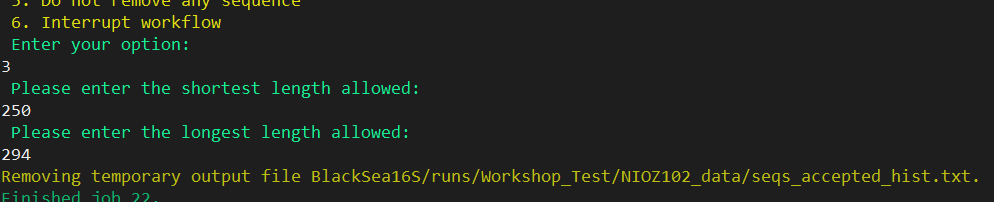

### 10. Once that your run is finished, locate the report “report_vsearch.zip” 
transfer the report_.zip to your computer   
[C:\Users\dnalab\Desktop\unix_workshop\Cascabel\report_vsearch.zip]

exit server  

go to directory  
`! cd /home/mobaxterm/Desktop/unix_workshop/Cascabel`   
Un-compress the file and inspect the report  
`! unzip report_vsearch.zip`

### the output file structure 
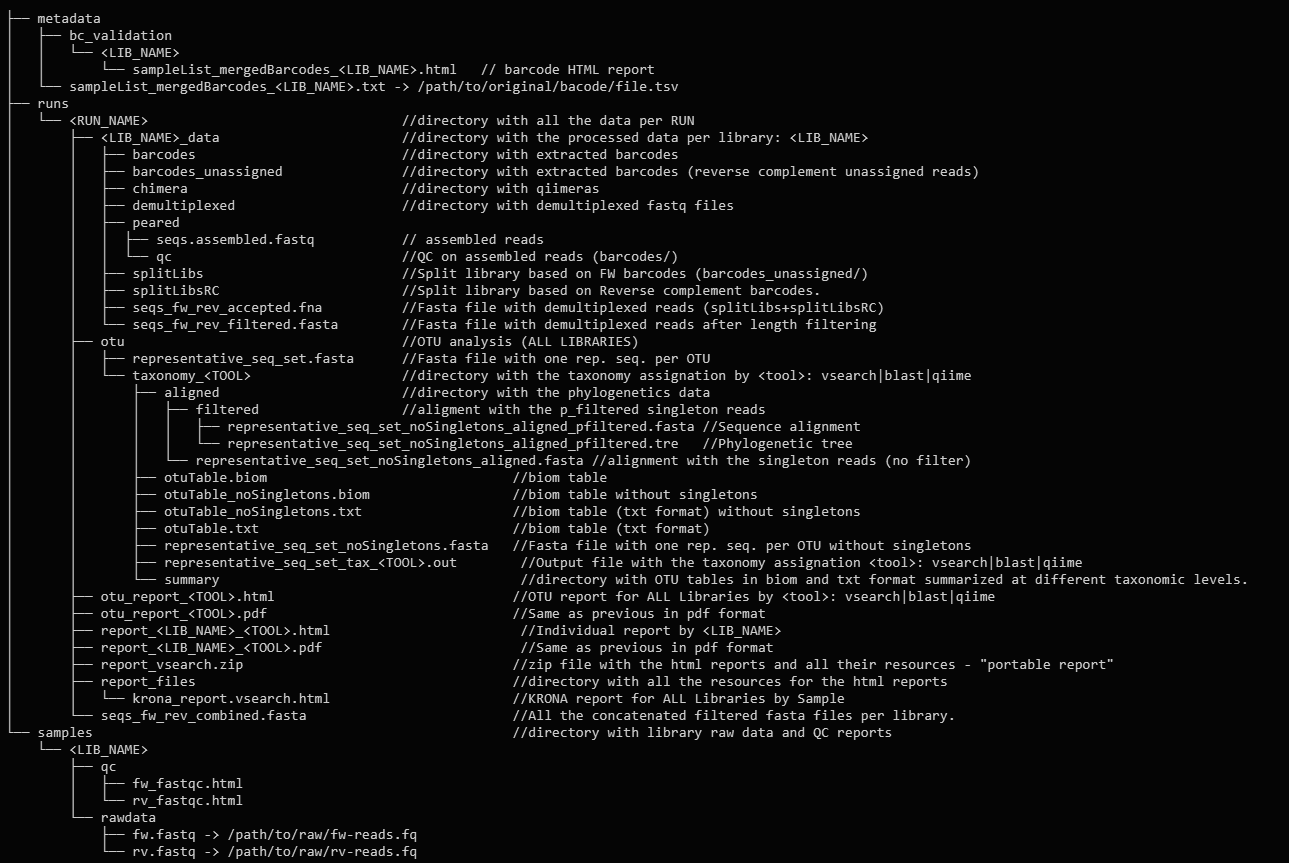